# Ejercicio N°2.3
##### Simple linear regression and transformation
Consider the data below on colon cancer mortality in different age groups (given as interval midpoints).
The mortality is in parts per million per year. (Data from Cairns, J. (1975): The cancer problem,
Scientific American 233, 64–78.)

_datos en ej2_3.csv_

In [12]:
#Librerias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


In [15]:
# Cargando data
dataset = pd.read_csv('ej2_3.csv')
age = dataset.iloc[:,0].values.reshape(-1,1) # convierte a un narray
mort = dataset.iloc[:,1].values.reshape(-1,1)
age

array([[22.5],
       [27.5],
       [32.5],
       [37.5],
       [42.5],
       [47.5],
       [52.5],
       [57.5],
       [62.5],
       [67.5],
       [72.5],
       [77.5],
       [82.5]])

# Item 1

* Verificar qué regresión encaja mejor con la data
    1. y VS x
    2. lny VS x
    3. lny VS lnx
    
Para esto _y = mortality x = age_

### 1. Y vs X

In [30]:
# mortality vs age
model_1 = LinearRegression()
result = model_1.fit(age,mort)
# hallando la ecuacion
coef_b = round(model_1.intercept_[0],4)
coef_a = round(model_1.coef_[0][0],4)


# Predicciones
print('\nPredicciones\n')
y1_test = model_1.predict([[23.0]])[0][0]
print('Para edad de 23.0 -> mortalidad: ' + str(round(y1_test,2)))

y2_test = model_1.predict([[83.0]])[0][0]
print('Para edad de 83.0 -> mortalidad: ' + str(round(y2_test,2)))

mort = 7.2013*age + (-254.4656)

Predicciones

Para edad de 23.0 -> mortalidad: -88.84
Para edad de 83.0 -> mortalidad: 343.24


R-Squared:  0.80772
Equation: lnmort = 5.3456*lnage + (-17.3468)


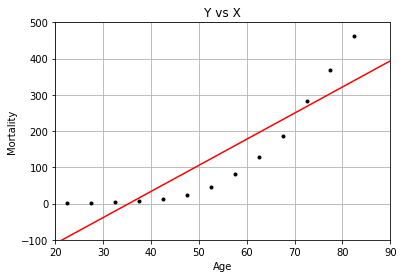

In [79]:
#Dibujando
plt.title('Y vs X')
plt.xlabel('Age')
plt.ylabel('Mortality')
plt.plot(age,mort,'k.')
plt.axis([20,90,-100, 500])
plt.grid(True)
extreme_ages = [[0],[90]]
plt.plot(extreme_ages, model_1.predict(extreme_ages), color='r')


# Hallando el R-Squared para comprobar
rSquared_1 = model_1.score(age, mort)
print('R-Squared:  %.5f' % rSquared_1)
print('Equation: lnmort = '+ str(coef_a) + '*lnage + ('+str(coef_b)+')') 

### 2. Lny vs X

In [64]:
# ln(mortality) vs x
model_2 = LinearRegression()
lnmort = np.log(mort)
model_2.fit(age, lnmort)
print(lnmort)

#ecuacion
coef_b = round(model_2.intercept_[0],4)
coef_a = round(model_2.coef_[0][0],4)


# Predicciones
print('\nPredicciones\n')
y1_test = model_2.predict([[26.0]])[0][0]
print('Para edad de 26.0 -> mortalidad: ' + str(round(y1_test,2)))

y2_test = model_2.predict([[67.0]])[0][0]
print('Para edad de 67.0 -> mortalidad: ' + str(round(y2_test,2)))

[[-0.54472718]
 [ 0.35065687]
 [ 1.22671229]
 [ 1.8916048 ]
 [ 2.56494936]
 [ 3.2148678 ]
 [ 3.8220983 ]
 [ 4.4091553 ]
 [ 4.85203026]
 [ 5.23110862]
 [ 5.6454469 ]
 [ 5.91079664]
 [ 6.13556489]]

Predicciones

Para edad de 26.0 -> mortalidad: 0.49
Para edad de 67.0 -> mortalidad: 5.05


R-Squared:  0.97202
Equation: lnmort = 5.3456*age + (-17.3468)


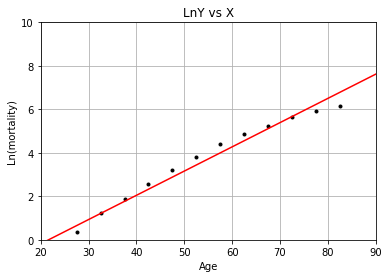

In [122]:
#dibujando
plt.title('LnY vs X')
plt.xlabel('Age')
plt.ylabel('Ln(mortality)')
plt.plot(age,lnmort,'k.')
plt.axis([20,90,0, 10])
plt.grid(True)
extreme_ages = [[0],[90]]
plt.plot(extreme_ages, model_2.predict(extreme_ages), color='r')


# Hallando el R-Squared para comprobar
rSquared_2 = model_2.score(age, lnmort)
print('R-Squared:  %.5f' % rSquared_2)
print('Equation: lnmort = '+ str(coef_a) + '*age + ('+str(coef_b)+')')  
a2 = coef_a
b2 = coef_b

### LnY vs LnX


In [71]:
# ln(mortality) vs ln(age)
model_3 = LinearRegression()
ln_age = np.log(age)
model_3.fit(ln_age, lnmort)
print(ln_age)
#ecuacion
coef_b = round(model_3.intercept_[0],4)
coef_a = round(model_3.coef_[0][0],4)


# Predicciones
print('\nPredicciones\n')
y1_test = model_3.predict([[2.0]])[0][0]
print('Para ln(16.0) -> ln(mortalidad): ' + str(round(y1_test,2)))

y2_test = model_3.predict([[4.0]])[0][0]
print('Para ln(54.0) -> ln(mortalidad:) ' + str(round(y2_test,2)))

[[3.11351531]
 [3.314186  ]
 [3.48124009]
 [3.62434093]
 [3.74950408]
 [3.86072971]
 [3.96081317]
 [4.05178495]
 [4.13516656]
 [4.2121276 ]
 [4.28358656]
 [4.35027794]
 [4.41279829]]

Predicciones

Para ln(16.0) -> ln(mortalidad): -6.66
Para ln(54.0) -> ln(mortalidad:) 4.04


R-Squared:  0.99810
Equation: lnmort = 5.3456*lnage + (-17.3468)


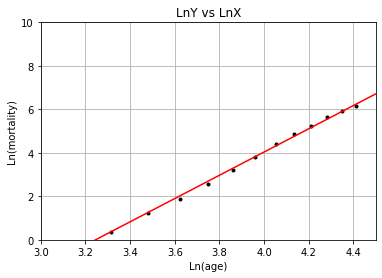

In [121]:
#dibujando
plt.title('LnY vs LnX')
plt.xlabel('Ln(age)')
plt.ylabel('Ln(mortality)')
plt.plot(ln_age,lnmort,'k.')
plt.axis([3,4.5,0, 10])
plt.grid(True)
extreme_ages = [[0],[90]]
plt.plot(extreme_ages, model_3.predict(extreme_ages), color='r')


# Hallando el R-Squared para comprobar
rSquared_3 = model_3.score(ln_age, lnmort)
print('R-Squared:  %.5f' % rSquared_3)
print('Equation: lnmort = '+ str(coef_a) + '*lnage + ('+str(coef_b)+')')

a1 = coef_a
b1 = coef_b

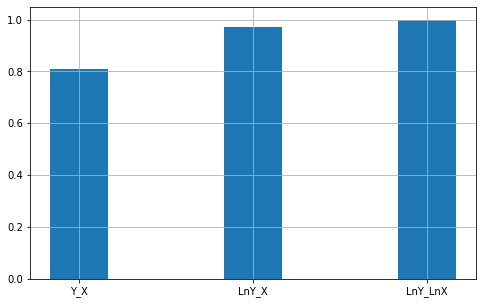

In [105]:
rSquares = [rSquared_1, rSquared_2, rSquared_3]
plt.figure(figsize=(8,5))
plt.grid(True)
plt.bar(x=[l*0.3 for l in range(3)], height=rSquares, width=0.1, tick_label=['Y_X', 'LnY_X', 'LnY_LnX'])
plt.show()

In [120]:
print('Podemos notar que la mejor regresion es LnY_LnX')
print('Además, el R^2 es 99.8% cuya ecuación es:\n')
print('lnmort = '+ str(coef_a) + '*lnage + ('+str(coef_b)+')')
print('\nSiendo los parámetros:')
print('Slope: \t\t'+ str(round(coef_a,2)) )
print('Intercept:\t'+ str(round(coef_b,2)) )

Podemos notar que la mejor regresion es LnY_LnX
Además, el R^2 es 99.8% cuya ecuación es:

lnmort = 5.3456*lnage + (-17.3468)

Siendo los parámetros:
Slope: 		5.35
Intercept:	-17.35


### Prediciendo valores / intervalos.
Para ello es necesario almacenar los parámetros de los dos modelos a comparar a1 b1 para LnY vs LnX  y a2 b2 para LnY vs X


In [191]:
print('lnY vs lnX')
print('a1:'+str(a1)+' b1: '+str(b1))
print('\nlnY vs X')
print('a2:'+str(a2)+' b2: '+str(b2))


#Probaremos con 5 edades de las que ya tenemos los valores esperados.
in_test = [[22.5],[37.5],[42.5],[62.5],[67.5]]
mort_esperada = [[0.58],[6.63],[13.0],[128.],[187.]]


#Modelo1 LnY_LnX
x1 = np.round(np.log(in_test),4)
y1 = np.round(np.log(mort_esperada),4)
#La entrada para el segundo modelo LnY vs X es diferente
x2 = np.asarray(in_test)
y2 = y1

print('\nEntrada de modelo1:')
print(x1)
print(y1)
print('\nEntrada de modelo2:')
print(x2)



lnY vs lnX
a1:5.3456 b1: -17.3468

lnY vs X
a2:5.3456 b2: -17.3468

Entrada de modelo1:
[[3.1135]
 [3.6243]
 [3.7495]
 [4.1352]
 [4.2121]]
[[-0.5447]
 [ 1.8916]
 [ 2.5649]
 [ 4.852 ]
 [ 5.2311]]

Entrada de modelo2:
[[22.5]
 [37.5]
 [42.5]
 [62.5]
 [67.5]]


In [199]:
#Para hallar el radio del intervalo es necesario el rss
#Modelo LnY_LnX model_3
p_y1 = model_3.predict(x1)
rss_1  = np.sum((np.ravel(y1) - np.ravel(p_y1))**2)
print('RSS: %.2f' %rss_1)

#Modelo LnY_X model_2
p_y2 = model_2.predict(x2)
rss_2  = np.sum((np.ravel(y2) - np.ravel(p_y2))**2)
print('RSS: %.2f' %rss_2)

#Desviaciones
stdv_1 = np.sqrt(1/(len(y1)-2)*rss_1)
print('STDV1 : %.2f' %stdv_1)
stdv_2 = np.sqrt(1/(len(y2)-2)*rss_2)
print('STDV2 : %.2f' %stdv_2)


#Calculando el intervalo de predicción
inter_1 = 1.96*stdv_1
inter_2 = 1.96*stdv_2


low_1 = np.round(y1 - inter_1,3)
upp_1 = np.round(y1 + inter_1,3)

low_2 = np.round(y2 - inter_2,3)
upp_2 = np.round(y2 + inter_2,3)

RSS: 0.07
RSS: 0.59
STDV1 : 0.16
STDV2 : 0.44


In [206]:
#Crearemos un dataframe para los valores del primero

print('MODELO LNY VS LNX')
labels = ['Entrada', 'Esperado', 'Predecido','desde','hasta']
df_model1 = pd.DataFrame(zip(x1,y1,np.round(p_y1,3),low_1,upp_1), columns=labels)
print(df_model1)

print('\nMODELO LNY VS X')
#Crearemos un dataframe para los valores del primero
df_model2 = pd.DataFrame(zip(x2,y2,np.round(p_y2,3),low_2,upp_2), columns=labels)
print(df_model2)

MODELO LNY VS LNX
    Entrada   Esperado Predecido     desde     hasta
0  [3.1135]  [-0.5447]  [-0.703]  [-0.851]  [-0.238]
1  [3.6243]   [1.8916]   [2.027]   [1.585]   [2.198]
2  [3.7495]   [2.5649]   [2.696]   [2.258]   [2.872]
3  [4.1352]    [4.852]   [4.758]   [4.545]   [5.159]
4  [4.2121]   [5.2311]   [5.169]   [4.924]   [5.538]

MODELO LNY VS X
  Entrada   Esperado Predecido     desde    hasta
0  [22.5]  [-0.5447]   [0.098]  [-1.414]  [0.324]
1  [37.5]   [1.8916]   [1.769]   [1.022]  [2.761]
2  [42.5]   [2.5649]   [2.326]   [1.696]  [3.434]
3  [62.5]    [4.852]   [4.553]   [3.983]  [5.721]
4  [67.5]   [5.2311]    [5.11]   [4.362]    [6.1]
